<a href="https://colab.research.google.com/github/kerenalli/DATA_MINING/blob/main/10032021_CNN_for_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Flatten,Dense,Dropout,BatchNormalization

from keras.layers import Conv1D,MaxPool1D

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

df = pd.read_csv("/content/drive/MyDrive/DataSet/creditcard.csv")

In [4]:
fraud_data = df[df['Class']==1]
non_fraud_data = df[df["Class"]==0]

In [8]:
print("\n there are true records: ")
print(non_fraud_data.shape)
print("\n there are fraud records: ")
print(fraud_data.shape)


 there are true records: 
(284315, 31)

 there are fraud records: 
(492, 31)


In [10]:
final_data = fraud_data.append(non_fraud_data,ignore_index=True)
final_data.shape

(284807, 31)

In [11]:
features=final_data.drop("Class",axis=1)
label=final_data["Class"]

#features.shape,label.shape
features.shape,label.shape

((284807, 30), (284807,))

In [12]:
features_train,features_test,labels_train,labels_test = train_test_split(
    features,label,test_size=.25,random_state=11,stratify = label)


In [13]:
features_train.shape,features_test.shape

((213605, 30), (71202, 30))

In [14]:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.fit_transform(features_test)


# converting features into dataframe
features_train = pd.DataFrame(features_train)
features_test = pd.DataFrame(features_test)

In [15]:
features_train = features_train.to_numpy()
features_test = features_test.to_numpy()

In [16]:
features_train =features_train.reshape(features_train.shape[0],features_train.shape[1],1)
features_test =features_test.reshape(features_test.shape[0],features_test.shape[1],1)

In [17]:
features_train.shape,features_test.shape

((213605, 30, 1), (71202, 30, 1))

In [18]:
epochs=25
model=Sequential()

model.add(Conv1D(32,2,activation='relu',input_shape=features_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

#flattening layer
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

#final layer
model.add(Dense(1,activation="sigmoid"))

#model.summary()
model.summary()

#model compile and fitting
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history =model.fit(features_train,labels_train,epochs=epochs,
                    validation_data = (features_test,labels_test),verbose=1)



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 14, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 13, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 6, 64)             0

In [20]:
def plot_learning_curve(history,epochs):
    
    epoch_range=range(1,epochs+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history["val_accuracy"])
    plt.title("Model Accuracy")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.legend("train","val",loc="upper left")
    plt.show()
    
    
     
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  if __name__ == '__main__':


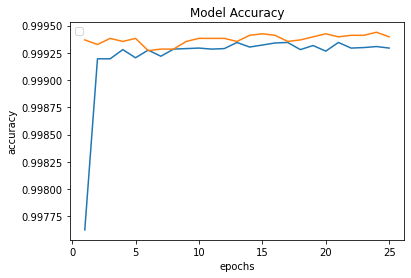

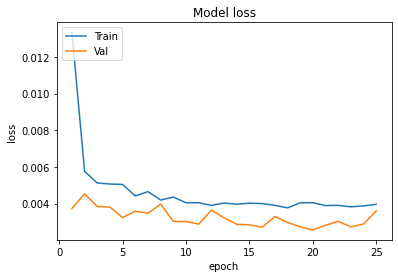

In [21]:
plot_learning_curve(history,epochs)

In [22]:
final_acc = model.evaluate(features_train,labels_train)
final_acc

6676/6676 [==============================] - 11s 2ms/step - loss: 0.0036 - accuracy: 0.9994


[0.0036210224498063326, 0.9994054436683655]

In [25]:
final_acc2 = model.evaluate(features_test,labels_test)
final_acc2

2226/2226 [==============================] - 4s 2ms/step - loss: 0.0036 - accuracy: 0.9994


[0.003602120094001293, 0.9993960857391357]

In [23]:
pred = model.predict(features_test)
pred_label=pred.argmax(axis=1)
#confusion_matrix
cm=confusion_matrix(labels_test,pred.round())
cm

array([[71059,    20],
       [   23,   100]])

In [26]:
pred = model.predict(features_train)
pred_label=pred.argmax(axis=1)
#confusion_matrix
cm=confusion_matrix(labels_train,pred.round())
cm

array([[213185,     51],
       [    76,    293]])